In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [58]:
crash_df = sns.load_dataset('car_crashes')
crash_df.drop('abbrev', axis=1, inplace=True)
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63


#### Heatmaps

<Axes: >

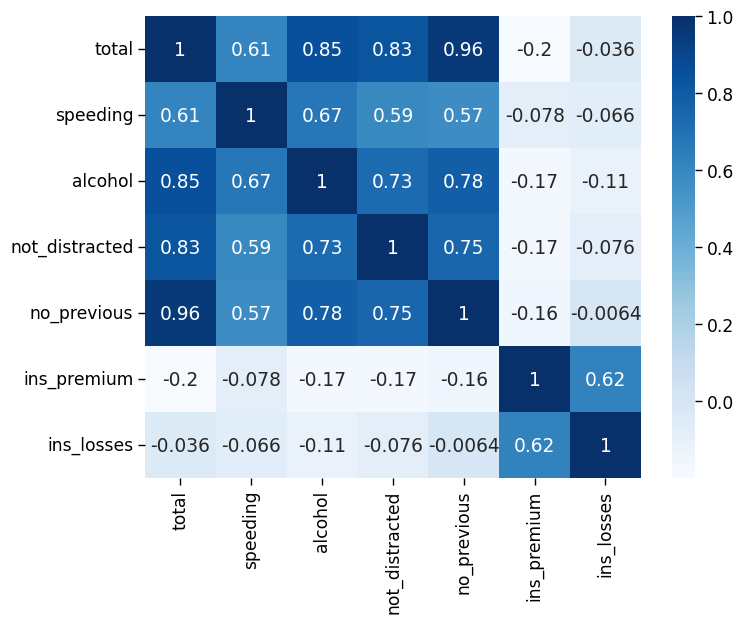

In [59]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

crash_mx = crash_df.corr()

sns.heatmap(crash_mx, annot=True, cmap='Blues')

In [60]:
flights_df = sns.load_dataset('flights')
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [61]:
flights_df = flights_df.pivot_table(index='month', columns='year', values='passengers')
flights_df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14180\3557946959.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights_df = flights_df.pivot_table(index='month', columns='year', values='passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

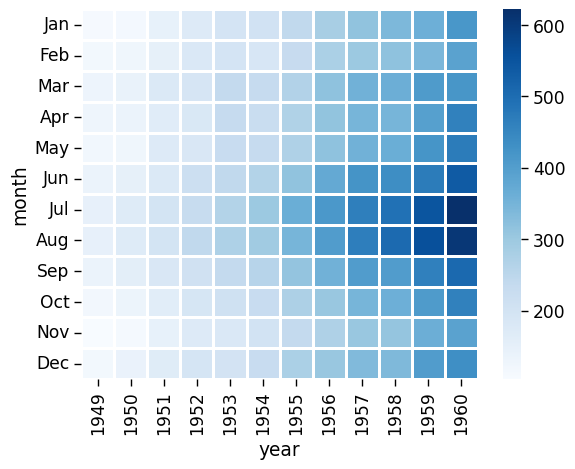

In [62]:
sns.heatmap(flights_df, cmap='Blues', linewidths=1, linecolor='white')

#### Cluster Map

In [63]:
iris =  sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


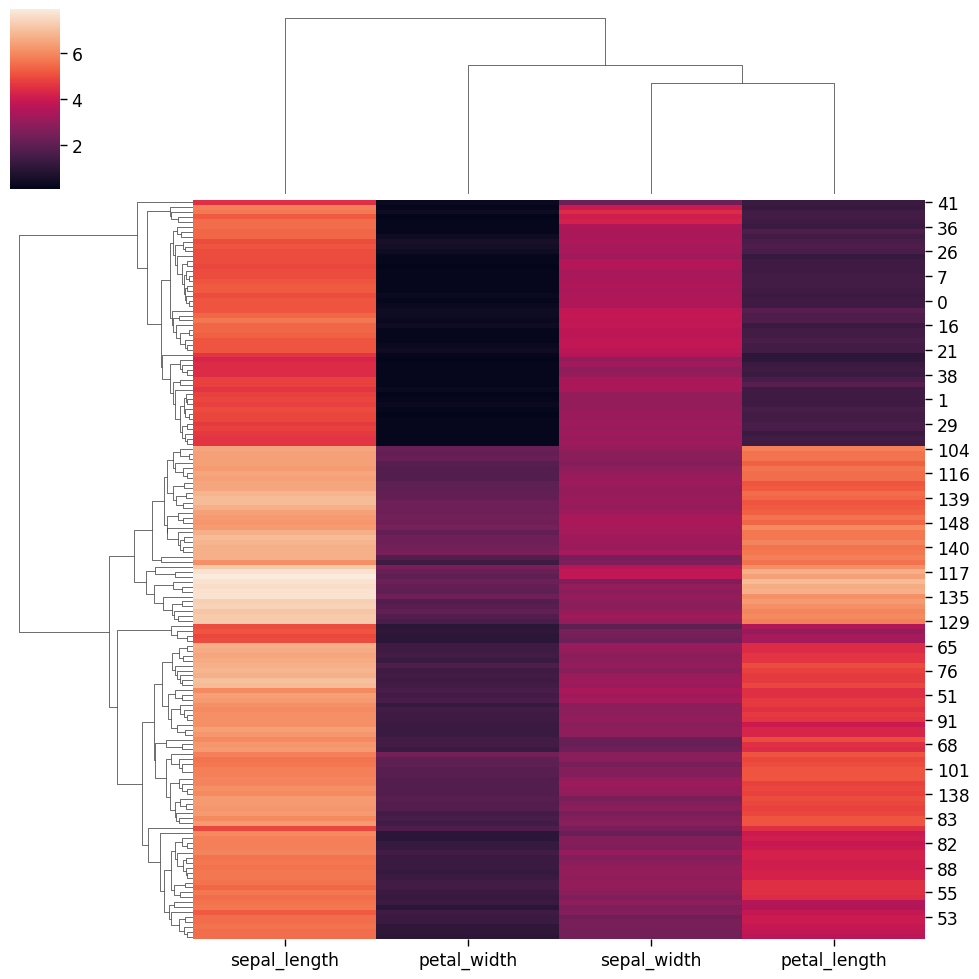

In [64]:
species = iris.drop('species', axis=1)
sns.clustermap(species)

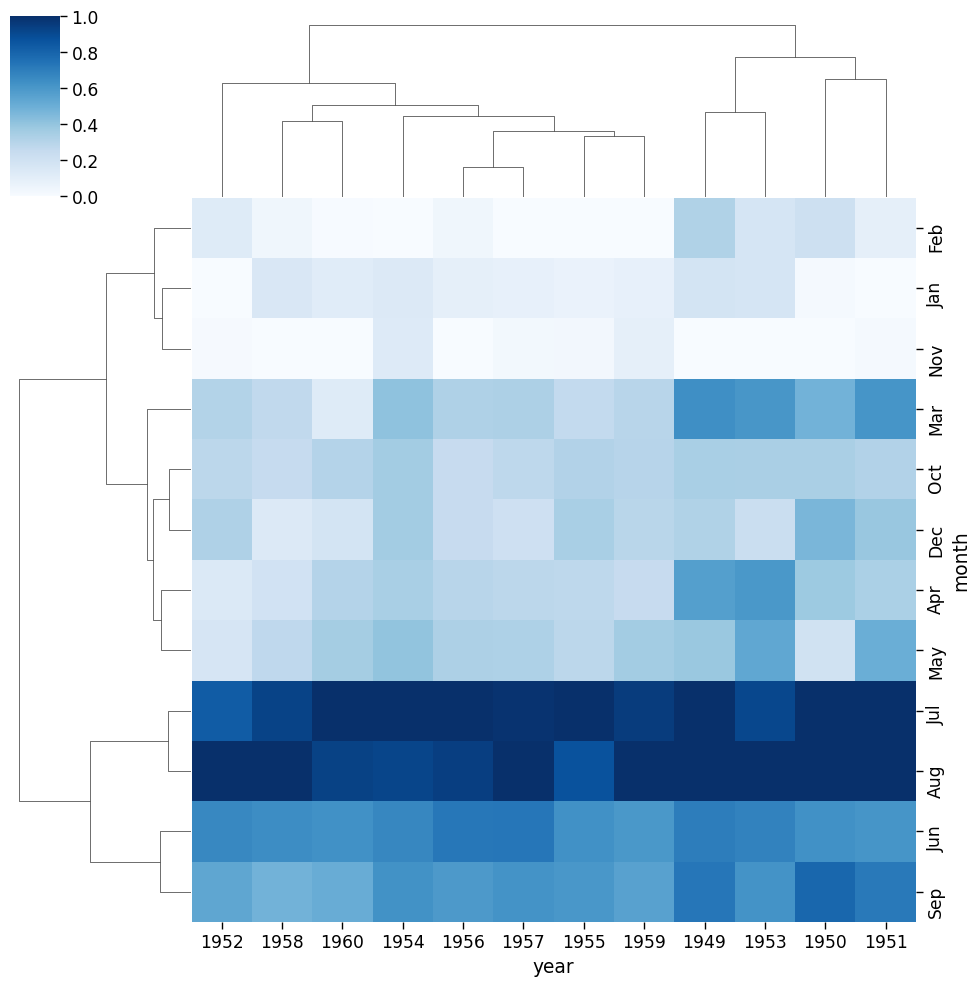

In [65]:
sns.clustermap(flights_df, cmap='Blues', standard_scale=1)


#### Pair Grid

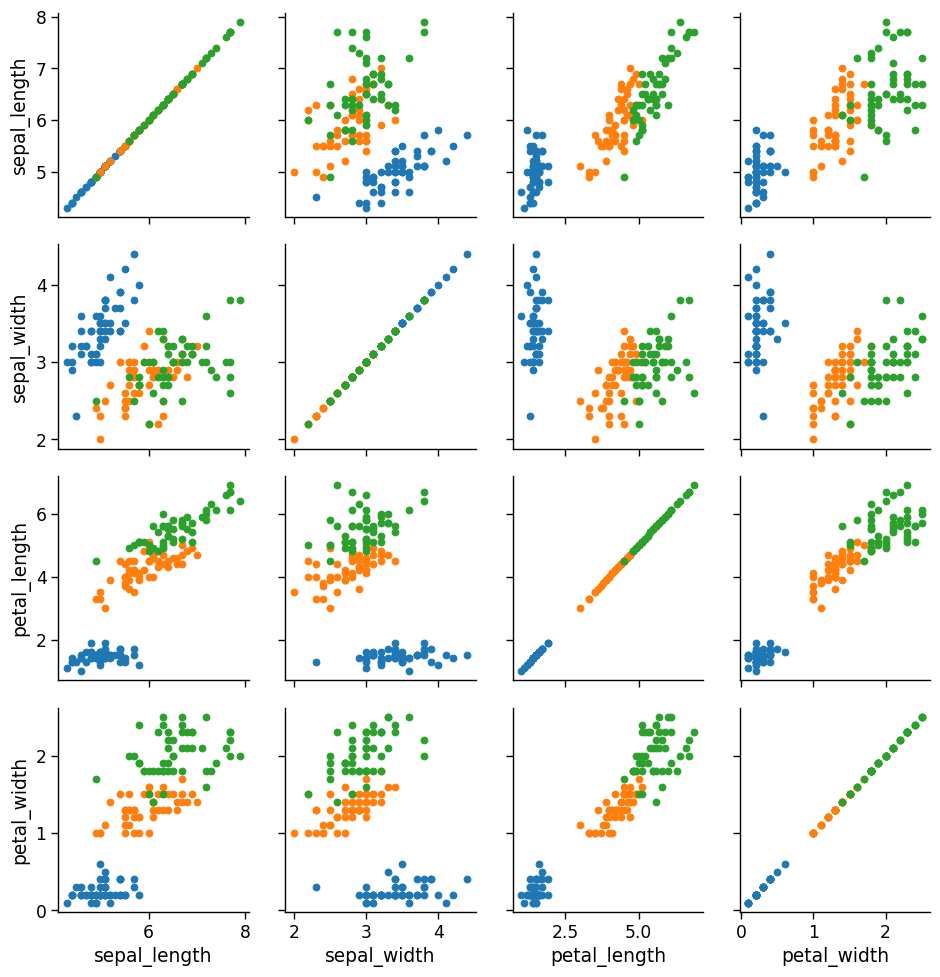

In [66]:
iris = sns.load_dataset('iris')
iris_g =  sns.PairGrid(iris, hue='species')
iris_g.map(plt.scatter)

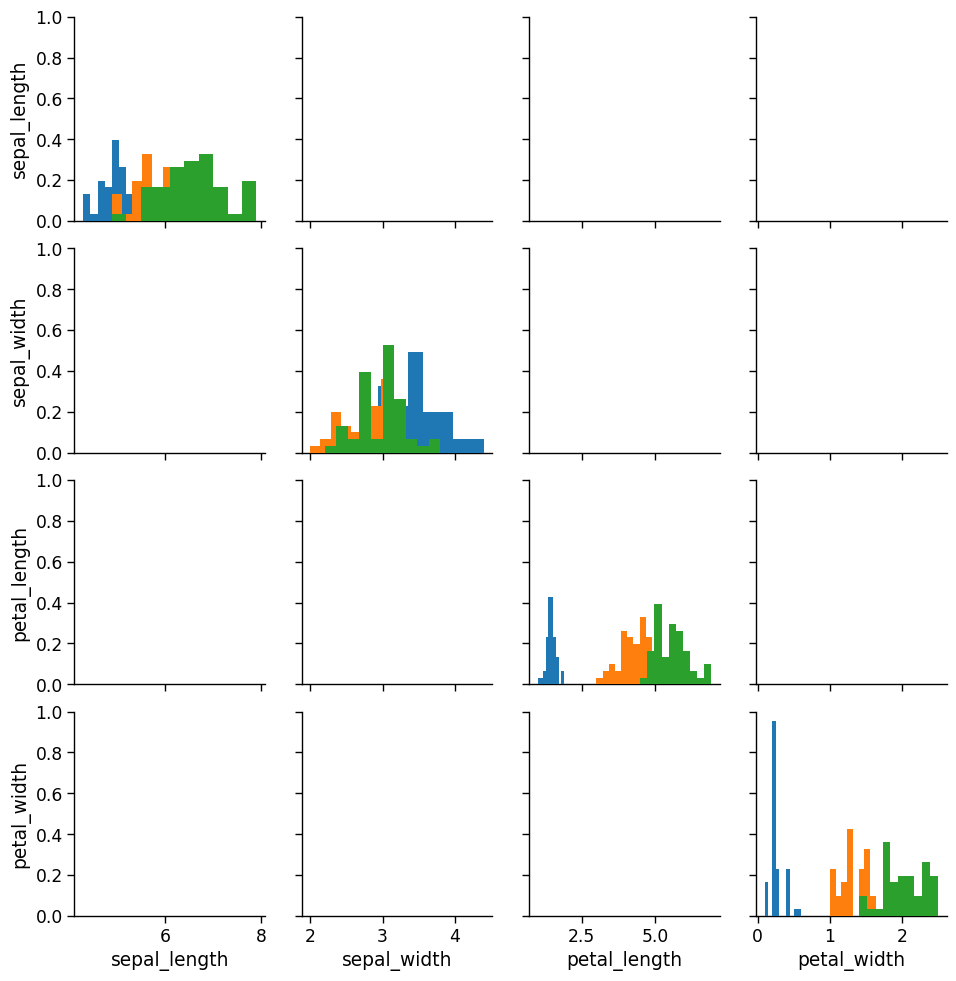

In [67]:
iris_g =  sns.PairGrid(iris, hue='species')
iris_g.map_diag(plt.hist)

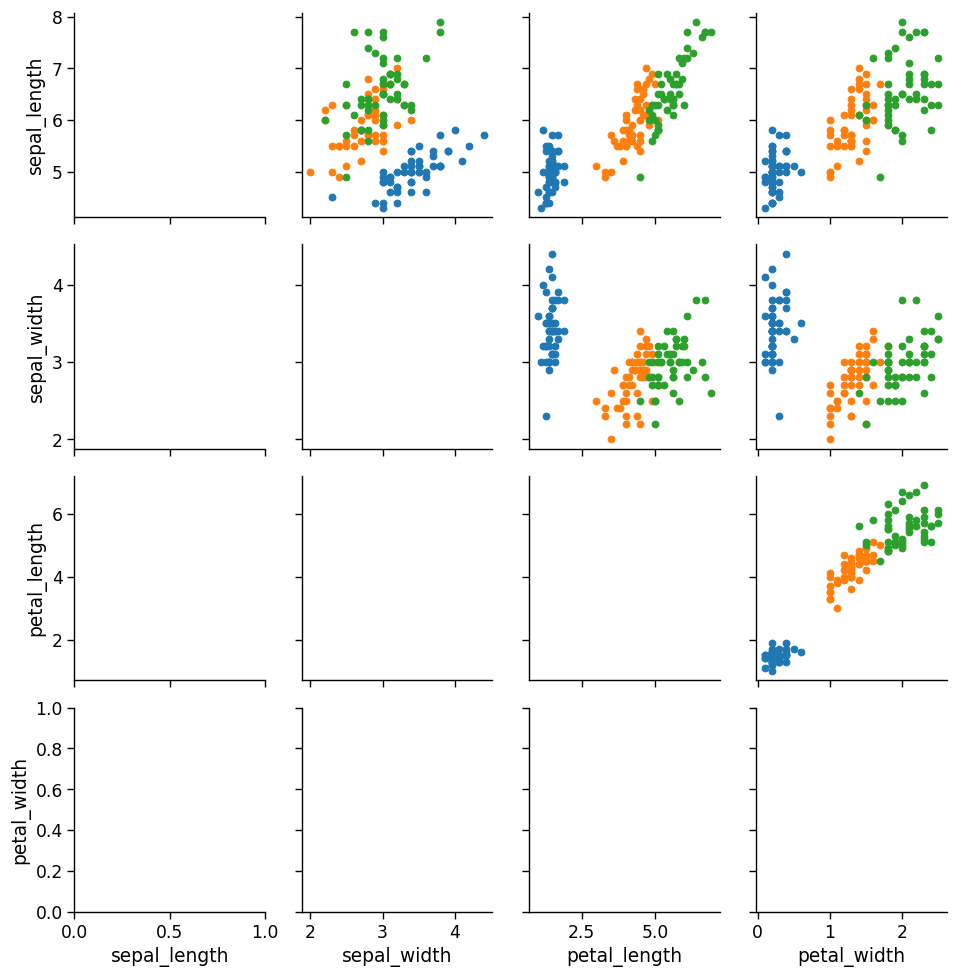

In [68]:
iris_g =  sns.PairGrid(iris, hue='species')
iris_g.map_upper(plt.scatter)

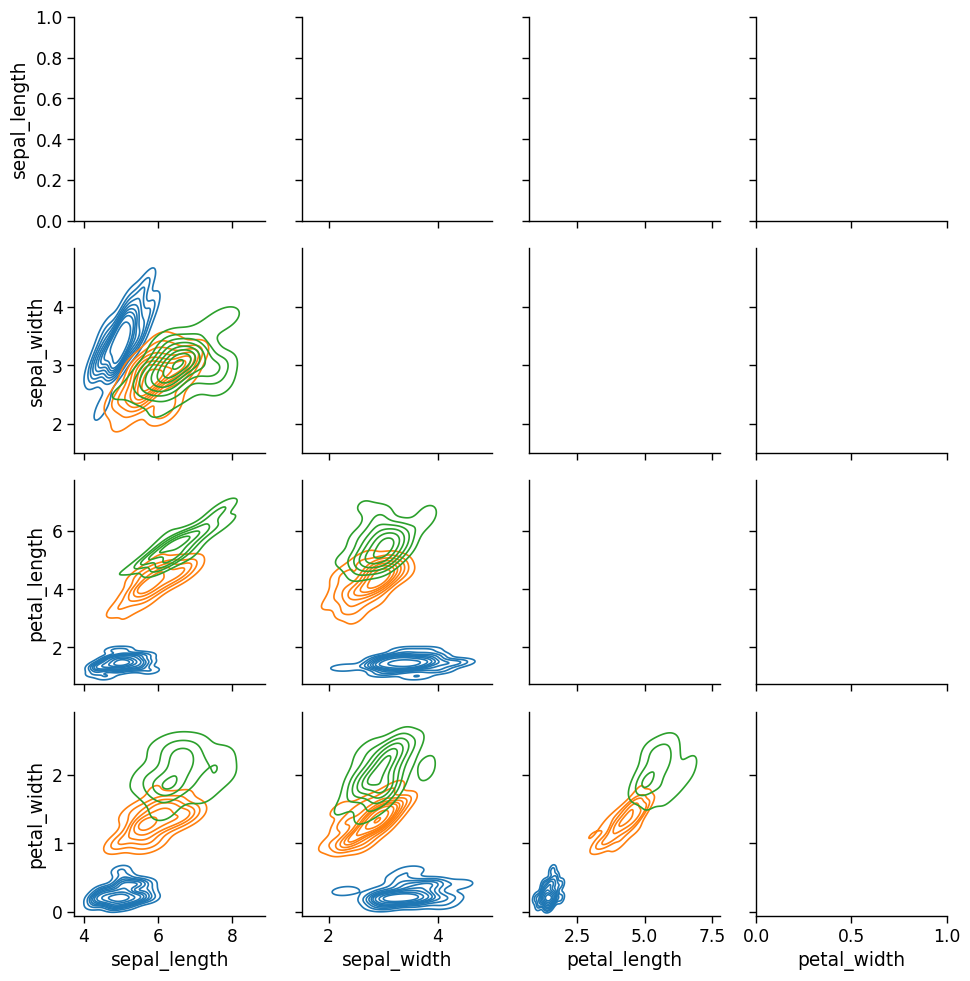

In [69]:
iris_g =  sns.PairGrid(iris, hue='species')
iris_g.map_lower(sns.kdeplot)

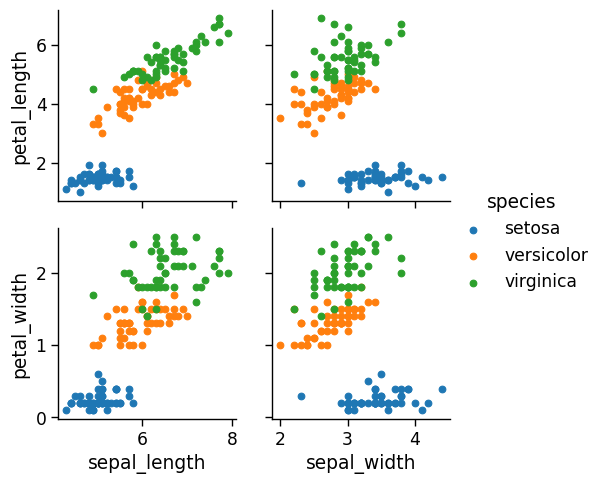

In [70]:
iris_g = sns.PairGrid(iris, hue="species", x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)
iris_g.add_legend()

#### Facet Grid

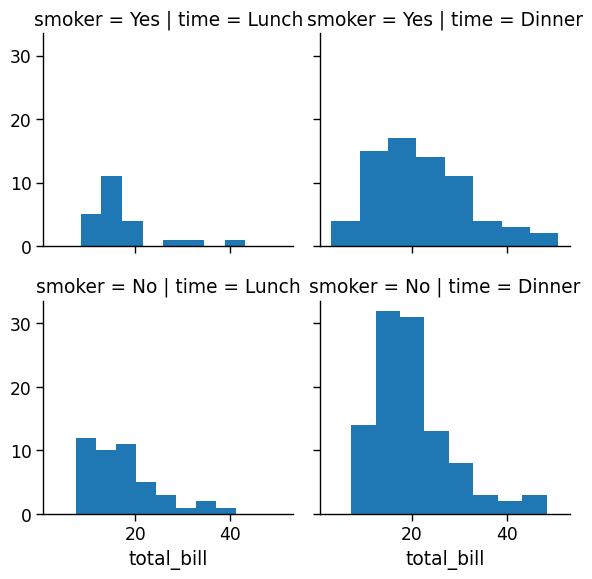

In [71]:
tips_df = sns.load_dataset('tips')
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

tips_fg.map(plt.hist, 'total_bill', bins=8)

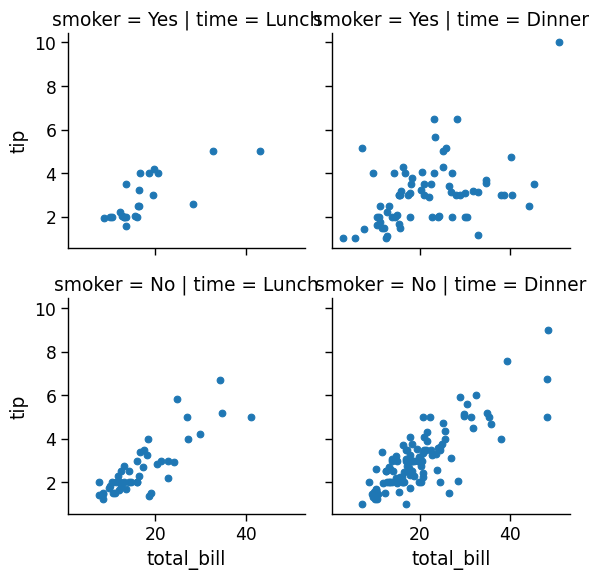

In [72]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.scatter, 'total_bill', 'tip')

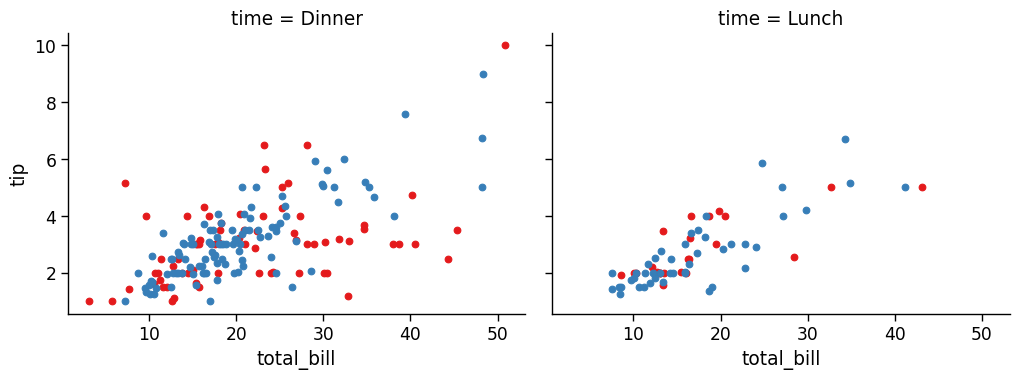

In [73]:
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
                        col_order=['Dinner', 'Lunch'], palette='Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip')

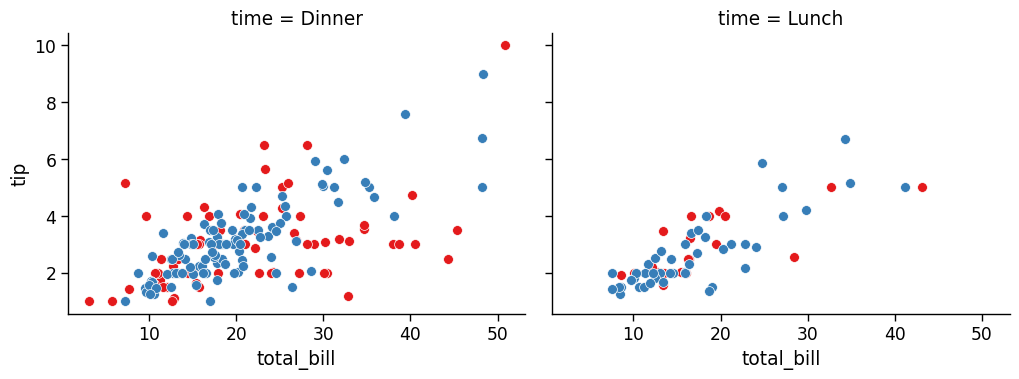

In [74]:
kws = dict(s=50, linewidth=.5, edgecolor='w')
kips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
                        hue_order=['Yes', 'No'],
                        hue_kws=dict(marker=['^','v']))
tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

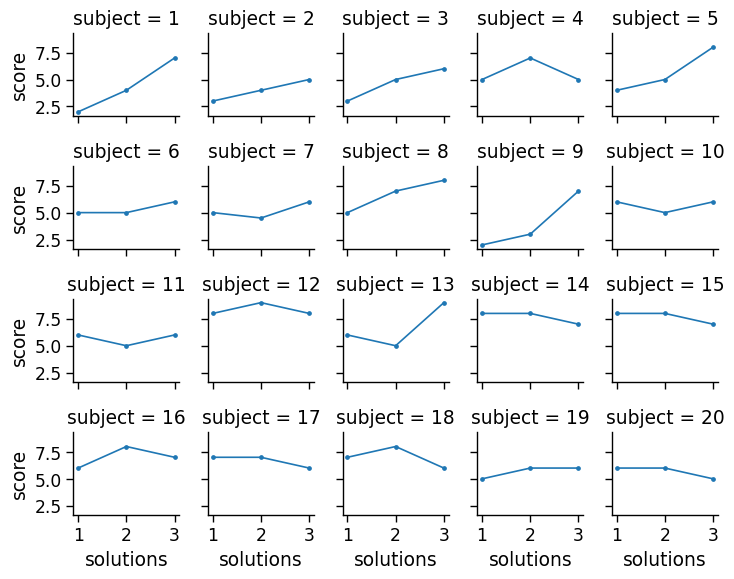

In [75]:
att_df = sns.load_dataset('attention')
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

#### Regression Plots

AttributeError: PathCollection.set() got an unexpected keyword argument 'scatter_kws'

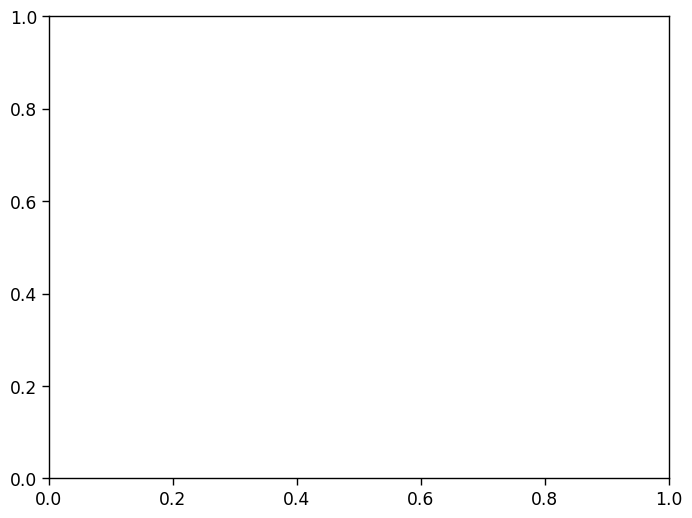

In [76]:
plt.figure(figsize=(8, 6))
sns.set_context('paper', font_scale=1.4)
sns.scatterplot(x="total_bill", y='tip', hue='sex', data=tips_df, markers=['o', '^'],
                scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})